Common Import header and reading in data from drive (used throughout all project google colabs) 

In [ ]:
!pip install geopandas
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")
import geopandas as gpd
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 23.0 MB/s 
     |████████████████████████████████| 16.7 MB 58.2 MB/s 
     |████████████████████████████████| 6.3 MB 61.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
crashdf = pd.read_csv('SDOT_Collisions_-_All_Years (1).csv')

In [ ]:
crashdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237176 entries, 0 to 237175
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                229433 non-null  float64
 1   Y                229433 non-null  float64
 2   OBJECTID         237176 non-null  int64  
 3   INCKEY           237176 non-null  int64  
 4   COLDETKEY        237176 non-null  int64  
 5   ADDRTYPE         233311 non-null  object 
 6   COLLISIONTYPE    205840 non-null  object 
 7   EXCEPTRSNCODE    116773 non-null  object 
 8   EXCEPTRSNDESC    12436 non-null   object 
 9   FATALITIES       237176 non-null  int64  
 10  INATTENTIONIND   30613 non-null   object 
 11  INCDATE          237176 non-null  object 
 12  INCDTTM          237176 non-null  object 
 13  INJURIES         237176 non-null  int64  
 14  INTKEY           78120 non-null   float64
 15  JUNCTIONTYPE     224616 non-null  object 
 16  LIGHTCOND        205519 non-null  obje

In [ ]:
crashdf.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,COLLISIONTYPE,EXCEPTRSNCODE,EXCEPTRSNDESC,FATALITIES,...,SPEEDING,ST_COLCODE,ST_COLDESC,STATUS,UNDERINFL,VEHCOUNT,WEATHER,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.264594,47.523882,1,63300,63300,Block,Parked Car,NaN,NaN,0,...,NaN,32,One parked--one moving,Matched,0,2,Clear,0,0,N
1,-122.313029,47.670213,2,1194,1194,Block,Parked Car,,NaN,0,...,NaN,32,One parked--one moving,Matched,Y,2,Overcast,0,0,N
2,-122.270060,47.510992,3,46900,46900,Block,Parked Car,NaN,NaN,0,...,NaN,32,One parked--one moving,Matched,0,2,Overcast,0,0,N
3,-122.312719,47.655347,4,58300,58300,Block,Angles,NaN,NaN,0,...,Y,10,Entering at angle,Matched,0,2,Clear,0,0,N
4,-122.339439,47.565776,5,120500,120500,Intersection,Right Turn,NaN,NaN,0,...,NaN,16,From same direction - one right turn - one str...,Matched,N,2,Clear,0,0,N


In [ ]:
crashdf[['SEVERITYCODE','SEVERITYDESC']].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    146708
2             Injury Collision                   62746
0             Unknown                            23801
2b            Serious Injury Collision            3512
3             Fatality Collision                   408
dtype: int64

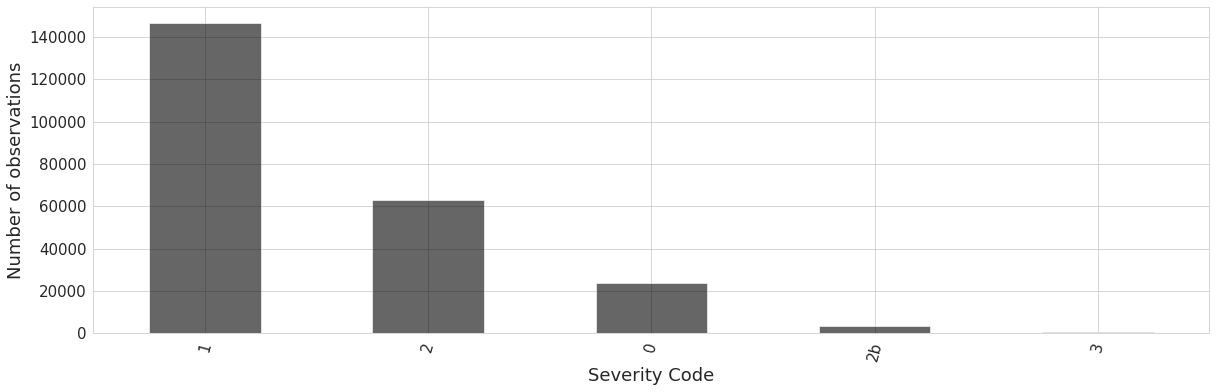

In [ ]:
#number of counts for each collision type for years 2018-2021
crashdf['SEVERITYCODE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Severity Code', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

Filtering by specific year

In [ ]:
crashdf.loc[:,"INCDATE"]

0         2006/08/11 00:00:00+00
1         2013/03/31 00:00:00+00
2         2005/05/08 00:00:00+00
3         2006/02/14 00:00:00+00
4         2011/12/05 00:00:00+00
                   ...          
237171    2020/01/24 00:00:00+00
237172    2020/01/04 00:00:00+00
237173    2019/12/14 00:00:00+00
237174    2019/08/31 00:00:00+00
237175    2020/02/07 00:00:00+00
Name: INCDATE, Length: 237176, dtype: object

Filtering crash data by specific years: 2018-2022




In [ ]:
yearsdf = crashdf[(crashdf["INCDATE"] > '2018/01/01 00:00:00+00') & (crashdf['INCDATE'] < '2021/12/31 00:00:00+00')]
yearsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38789 entries, 14 to 237175
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                38110 non-null  float64
 1   Y                38110 non-null  float64
 2   OBJECTID         38789 non-null  int64  
 3   INCKEY           38789 non-null  int64  
 4   COLDETKEY        38789 non-null  int64  
 5   ADDRTYPE         38447 non-null  object 
 6   COLLISIONTYPE    30542 non-null  object 
 7   EXCEPTRSNCODE    38789 non-null  object 
 8   EXCEPTRSNDESC    3175 non-null   object 
 9   FATALITIES       38789 non-null  int64  
 10  INATTENTIONIND   4194 non-null   object 
 11  INCDATE          38789 non-null  object 
 12  INCDTTM          38789 non-null  object 
 13  INJURIES         38789 non-null  int64  
 14  INTKEY           14325 non-null  float64
 15  JUNCTIONTYPE     36682 non-null  object 
 16  LIGHTCOND        30477 non-null  object 
 17  LOCATION  

Checking for null values

In [ ]:
null_values = yearsdf.isnull().sum()
null_values[0:40]

X                    679
Y                    679
OBJECTID               0
INCKEY                 0
COLDETKEY              0
ADDRTYPE             342
COLLISIONTYPE       8247
EXCEPTRSNCODE          0
EXCEPTRSNDESC      35614
FATALITIES             0
INATTENTIONIND     34595
INCDATE                0
INCDTTM                0
INJURIES               0
INTKEY             24464
JUNCTIONTYPE        2107
LIGHTCOND           8312
LOCATION             479
PEDCOUNT               0
PEDCYLCOUNT            0
PEDROWNOTGRNT      38030
PERSONCOUNT            0
REPORTNO               0
ROADCOND            8261
SDOT_COLCODE           0
SDOT_COLDESC           0
SDOTCOLNUM         38789
SERIOUSINJURIES        0
SEVERITYCODE           1
SEVERITYDESC           0
SPEEDING           37272
ST_COLCODE            19
ST_COLDESC          8247
STATUS                 0
UNDERINFL           8226
VEHCOUNT               0
WEATHER             8319
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0


Visuals and tables for the collision type 

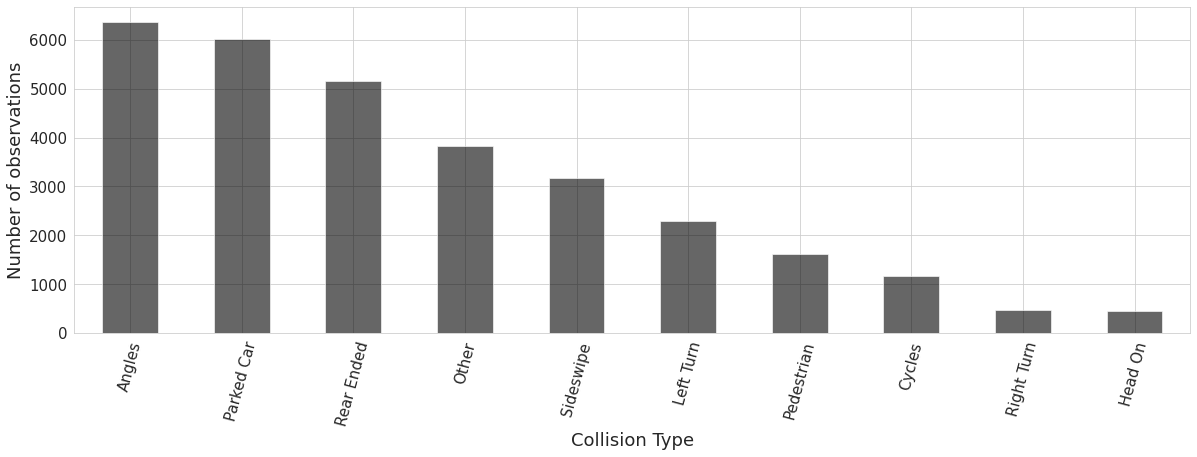

In [ ]:
#number of counts for each collision type for years 2018-2021
yearsdf['COLLISIONTYPE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Collision Type', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);


An angle collision occurs when one vehicle strikes another vehicle at an angle somewhere between 90 degrees (referred to as a side-impact collision) and 180 degrees (known as a rear-end collision).
Top three collisions are angles, parked car (wow..) and rear ended. 
The other category is quite big which should be considered when we are merging SENSYS data with crash data. 

In [ ]:
#death_injuries = yearsdf[['INJURIES', 'FATALITIES']]
#death_injuries

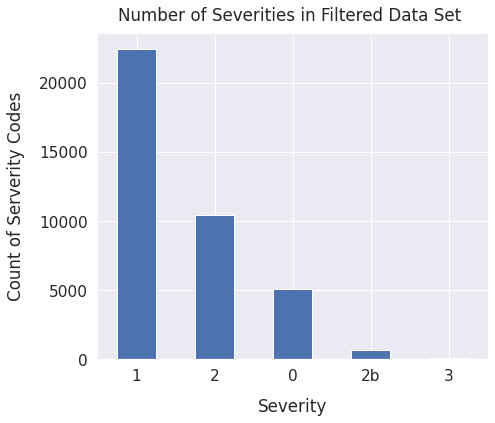

In [ ]:
sns.set(font_scale=1.4)
yearsdf['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Severity", labelpad=14)
plt.ylabel("Count of Serverity Codes", labelpad=14)
plt.title("Number of Severities in Filtered Data Set ", y=1.02);

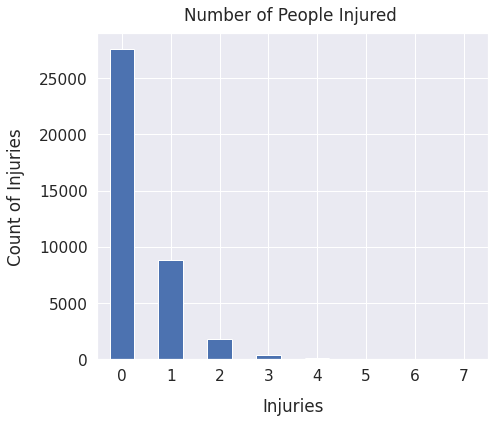

In [ ]:
sns.set(font_scale=1.4)
yearsdf['INJURIES'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Injuries", labelpad=14)
plt.ylabel("Count of Injuries", labelpad=14)
plt.title("Number of People Injured ", y=1.02);

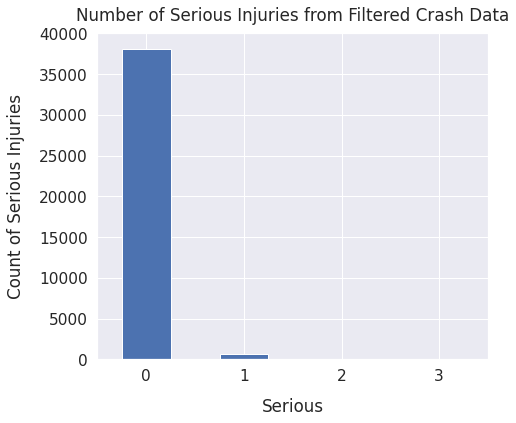

In [ ]:
sns.set(font_scale=1.4)
yearsdf['SERIOUSINJURIES'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Serious", labelpad=14)
plt.ylabel("Count of Serious Injuries", labelpad=14)
plt.title("Number of Serious Injuries from Filtered Crash Data", y=1.02);


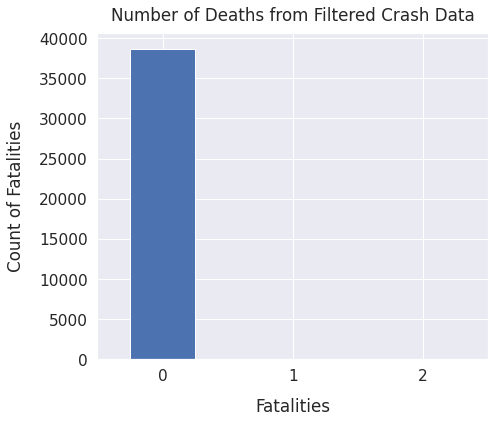

In [ ]:
sns.set(font_scale=1.4)
yearsdf['FATALITIES'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Fatalities", labelpad=14)
plt.ylabel("Count of Fatalities", labelpad=14)
plt.title("Number of Deaths from Filtered Crash Data", y=1.02);

Sweet! Can focus on injuries then 

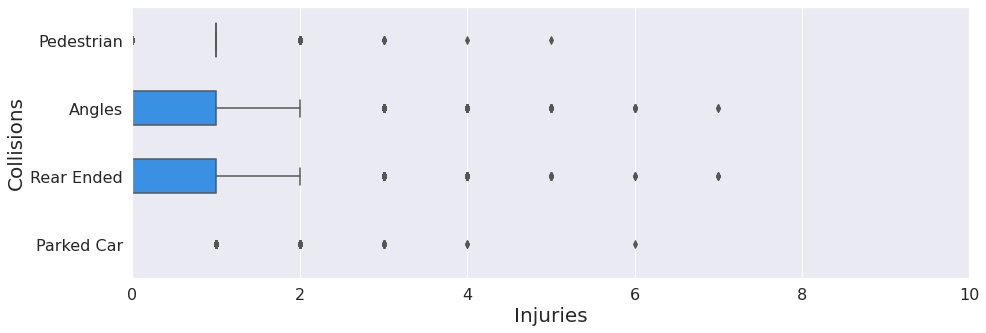

In [ ]:
# Set the figure size
plt.figure(figsize = (15,5))

# Our data is in tidy format, so we select the desired years
sns.boxplot(data = yearsdf[yearsdf['COLLISIONTYPE'].isin(["Angles","Parked Car","Rear Ended","Pedestrian"])], 
            x = "INJURIES", y='COLLISIONTYPE',color = 'dodgerblue', width = 0.5, orient = 'h')

# Label the axes
plt.ylabel('Collisions',fontsize = 20)
plt.xlabel('Injuries', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16)

# Limit the x axis
plt.xlim(0, 10);

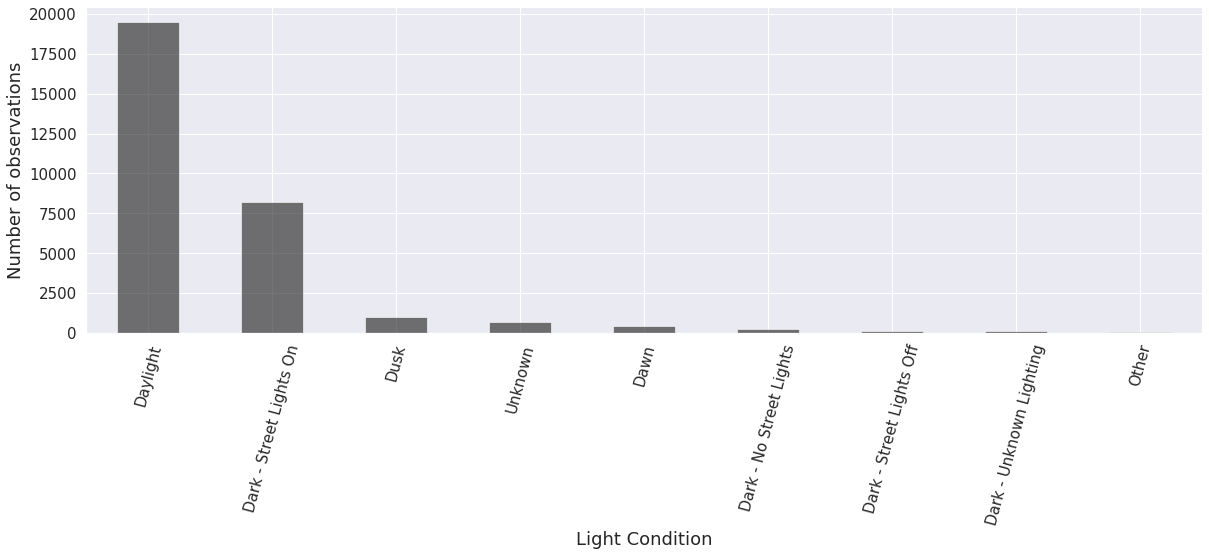

In [ ]:
yearsdf['LIGHTCOND'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Light Condition', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

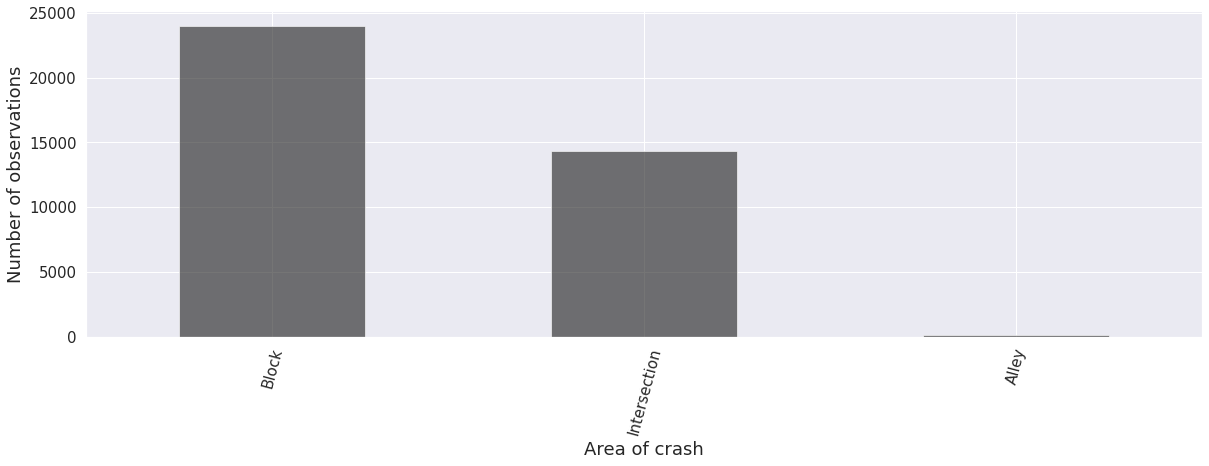

In [ ]:
yearsdf['ADDRTYPE'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel('Area of crash', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

 Relationship between severity of an accident and address type

In [ ]:
yearsdf['ADDRTYPE'].groupby(yearsdf['SEVERITYCODE']).value_counts(sort=True)

SEVERITYCODE  ADDRTYPE    
0             Block            4125
              Intersection      685
              Alley              38
1             Block           14609
              Intersection     7693
              Alley              81
2             Intersection     5550
              Block            4878
              Alley              18
2b            Intersection      356
              Block             322
3             Block              51
              Intersection       40
Name: ADDRTYPE, dtype: int64

Relationship between address type and collision type

In [ ]:
yearsdf['ADDRTYPE'].groupby(yearsdf['COLLISIONTYPE']).value_counts(sort=True)

COLLISIONTYPE  ADDRTYPE    
Angles         Intersection    5190
               Block           1150
               Alley             17
Cycles         Intersection     743
               Block            430
               Alley              1
Head On        Block            346
               Intersection     110
               Alley              1
Left Turn      Intersection    1862
               Block            421
Other          Block           2774
               Intersection    1013
               Alley             33
Parked Car     Block           5645
               Intersection     296
               Alley             35
Pedestrian     Intersection    1129
               Block            476
               Alley             10
Rear Ended     Block           3991
               Intersection    1161
               Alley              1
Right Turn     Intersection     265
               Block            203
Sideswipe      Block           2424
               Intersection     744


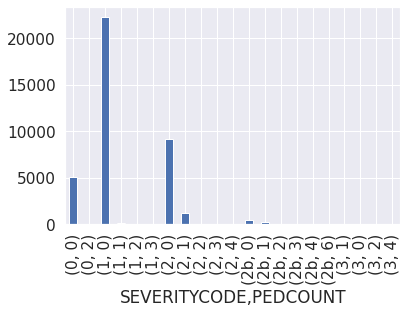

In [ ]:
#make it pretty later
yearsdf['PEDCOUNT'].groupby(yearsdf['SEVERITYCODE']).value_counts(sort=True).plot(kind='bar')